<a href="https://colab.research.google.com/github/mJekal/pytorch_study/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98(PyTorch)_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)


In [1]:
import torch

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

### 텐서 초기화

In [2]:
x = torch.empty(4,2)
print(x)

tensor([[9.4797e-38, 1.5168e-36],
        [1.5404e-36, 1.5169e-36],
        [6.4694e-39, 3.0545e-27],
        [2.8422e-14, 2.5798e+21]])


In [3]:
x = torch.rand(4,2)
print(x)

tensor([[0.2516, 0.1964],
        [0.4378, 0.2425],
        [0.6749, 0.8156],
        [0.2976, 0.4901]])


In [4]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [5]:
x = torch.tensor([3,2,3])
print(x)

tensor([3, 2, 3])


In [6]:
x = x.new_ones(2, 4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [7]:
x = torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[ 0.8463, -1.3470,  0.9565, -0.0933],
        [ 0.0398, -0.2596,  0.4646, -0.4456]])


텐서의 크기 계산

In [8]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

In [9]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [10]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [11]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [12]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [13]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.5284])
1.5284029245376587
torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available()else'cpu')
print(device)
y = torch.ones_like(x,device=device)
print(y)
x=x.to(device)
z = x + y
print(z)
print(z.to('cpu',torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([2.5284], device='cuda:0')
tensor([2.5284], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [15]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [16]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

In [17]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

In [18]:
t3 = torch.tensor([[[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

In [19]:
import math

a = torch.rand(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,-0.5,0.5))


tensor([[-0.0435, -0.7799]])
tensor([[0.0435, 0.7799]])
tensor([[-0., -0.]])
tensor([[-1., -1.]])
tensor([[-0.0435, -0.5000]])


In [20]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1 , 2, 3])))

tensor([[-0.0435, -0.7799]])
tensor(-0.7799)
tensor(-0.0435)
tensor(-0.4117)
tensor(0.5207)
tensor(0.0339)
tensor([1, 2, 3])





`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [21]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))


tensor([[0.5245, 0.9790],
        [0.2538, 0.4546]])
torch.return_types.max(
values=tensor([0.5245, 0.9790]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.9790, 0.4546]),
indices=tensor([1, 1]))


In [22]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.5245, 0.9790],
        [0.2538, 0.4546]])
torch.return_types.min(
values=tensor([0.2538, 0.4546]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.5245, 0.2538]),
indices=tensor([0, 0]))


In [23]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[0.5092, 0.1579],
        [0.9570, 0.7652]])


`torch.add`: 덧셈

In [24]:
print(x + y)
print(torch.add(x,y))

tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])


결과 텐서를 인자로 제공

In [25]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])


<ipython-input-25-8c3c98e3bad2>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.add(x, y, out=result)


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [26]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[0.5092, 0.1579],
        [0.9570, 0.7652]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])


`torch.sub`: 뺄셈

In [27]:
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])
tensor([[-0.5092, -0.1579],
        [-0.9570, -0.7652]])
tensor([[-0.5092, -0.1579],
        [-0.9570, -0.7652]])
tensor([[-0.5092, -0.1579],
        [-0.9570, -0.7652]])


`torch.mul`: 곱셉

In [28]:
print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])
tensor([[0.8267, 0.3178],
        [0.0453, 0.2322]])
tensor([[0.8267, 0.3178],
        [0.0453, 0.2322]])
tensor([[0.8267, 0.3178],
        [0.0453, 0.2322]])


`torch.div`: 나눗셈

In [29]:
print(x)
print(y)
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])
tensor([[0.5752, 0.7564],
        [0.0451, 0.2332]])
tensor([[0.5752, 0.7564],
        [0.0451, 0.2332]])
tensor([[0.5752, 0.7564],
        [0.0451, 0.2332]])


`torch.mm`: 내적(dot product)

In [30]:
print(x)
print(y)
print(torch.matmul(x,y))
z=torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[0.6896, 0.4903],
        [0.0452, 0.2327]])
tensor([[1.1988, 0.6481],
        [1.0022, 0.9979]])
tensor([[1.3180, 0.9362],
        [0.2874, 0.2615]])
tensor([[1.3180, 0.9362],
        [0.2874, 0.2615]])
torch.return_types.svd(
U=tensor([[-0.9727, -0.2323],
        [-0.2323,  0.9727]]),
S=tensor([1.6621, 0.0455]),
V=tensor([[-0.8115, -0.5844],
        [-0.5844,  0.8115]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [31]:
x = torch.Tensor([[1, 2],
                  [3,4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])
print(x[0, :])
print(x[1,: ])



tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [32]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1)
print(z)

tensor([[ 0.2155, -0.2827, -0.2746, -0.8454, -0.6807],
        [ 0.9392, -1.4039, -1.2889, -0.6477, -0.5275],
        [-0.3608,  0.4158,  1.2213, -0.5253, -0.0968],
        [ 0.0806,  0.7921,  0.4558,  0.5205,  0.0763]])
tensor([ 0.2155, -0.2827, -0.2746, -0.8454, -0.6807,  0.9392, -1.4039, -1.2889,
        -0.6477, -0.5275, -0.3608,  0.4158,  1.2213, -0.5253, -0.0968,  0.0806,
         0.7921,  0.4558,  0.5205,  0.0763])
tensor([[ 0.2155, -0.2827, -0.2746, -0.8454],
        [-0.6807,  0.9392, -1.4039, -1.2889],
        [-0.6477, -0.5275, -0.3608,  0.4158],
        [ 1.2213, -0.5253, -0.0968,  0.0806],
        [ 0.7921,  0.4558,  0.5205,  0.0763]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [33]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.8475])
-0.8474830985069275
torch.float32




스칼라값 하나만 존재해야 `item()` 사용 가능

In [34]:
x = torch.randn(2)
print(x)
# print(x.item())  스칼라값 하나만 존재해야 item() 사용 가능
print(x.dtype)

tensor([ 0.1438, -0.6070])
torch.float32


`squeeze`: 차원을 축소(제거)

In [35]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.7137, 0.8942, 0.1718],
         [0.2901, 0.0279, 0.4012],
         [0.7616, 0.6547, 0.6924]]])
torch.Size([1, 3, 3])


In [36]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.7137, 0.8942, 0.1718],
        [0.2901, 0.0279, 0.4012],
        [0.7616, 0.6547, 0.6924]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [37]:
t = torch.randn(3,3)
print(t)
print(t.shape)

tensor([[ 1.3216,  1.6874, -0.2261],
        [-1.0417,  0.2385,  1.2379],
        [-1.0817,  0.7345,  0.1175]])
torch.Size([3, 3])


In [38]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[ 1.3216,  1.6874, -0.2261],
         [-1.0417,  0.2385,  1.2379],
         [-1.0817,  0.7345,  0.1175]]])
torch.Size([1, 3, 3])


In [39]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[ 1.3216],
         [ 1.6874],
         [-0.2261]],

        [[-1.0417],
         [ 0.2385],
         [ 1.2379]],

        [[-1.0817],
         [ 0.7345],
         [ 0.1175]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [40]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [41]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[ 0.9004, -0.9159, -0.3227],
         [ 1.5120,  2.5176,  0.1025],
         [-1.1455, -1.4630, -1.1003]]])
tensor([[[ 0.9464, -0.5189,  0.5025],
         [-1.2896, -0.2718,  0.1624],
         [ 0.1837,  0.5143, -1.1232]]])
tensor([[[ 0.9004, -0.9159, -0.3227],
         [ 1.5120,  2.5176,  0.1025],
         [-1.1455, -1.4630, -1.1003]],

        [[ 0.9464, -0.5189,  0.5025],
         [-1.2896, -0.2718,  0.1624],
         [ 0.1837,  0.5143, -1.1232]]])
torch.Size([2, 3, 3])


In [42]:
c = torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[ 0.9004, -0.9159, -0.3227],
         [ 1.5120,  2.5176,  0.1025],
         [-1.1455, -1.4630, -1.1003],
         [ 0.9464, -0.5189,  0.5025],
         [-1.2896, -0.2718,  0.1624],
         [ 0.1837,  0.5143, -1.1232]]])
torch.Size([1, 6, 3])


In [43]:
c = torch.cat((a,b),dim=2)
print(c)
print(c.size())

tensor([[[ 0.9004, -0.9159, -0.3227,  0.9464, -0.5189,  0.5025],
         [ 1.5120,  2.5176,  0.1025, -1.2896, -0.2718,  0.1624],
         [-1.1455, -1.4630, -1.1003,  0.1837,  0.5143, -1.1232]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용

In [44]:
c
print(tensor)

t1, t2, t3 = torch.chunk(tensor,3,dim=1)
print(t1)
print(t2)
print(t3)

tensor([[[ 1.3216],
         [ 1.6874],
         [-0.2261]],

        [[-1.0417],
         [ 0.2385],
         [ 1.2379]],

        [[-1.0817],
         [ 0.7345],
         [ 0.1175]]])
tensor([[[ 1.3216]],

        [[-1.0417]],

        [[-1.0817]]])
tensor([[[1.6874]],

        [[0.2385]],

        [[0.7345]]])
tensor([[[-0.2261]],

        [[ 1.2379]],

        [[ 0.1175]]])


`split`: `chunk`와 동일한 기능이지만 조금 다름



In [45]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8502, 0.6041, 0.6744, 0.9065, 0.4438, 0.8419],
        [0.9971, 0.5651, 0.0180, 0.5112, 0.9841, 0.1005],
        [0.1254, 0.9260, 0.0633, 0.3297, 0.0795, 0.4258]])
tensor([[0.8502, 0.6041, 0.6744],
        [0.9971, 0.5651, 0.0180],
        [0.1254, 0.9260, 0.0633]])
tensor([[0.9065, 0.4438, 0.8419],
        [0.5112, 0.9841, 0.1005],
        [0.3297, 0.0795, 0.4258]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [46]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [47]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [48]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [49]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [50]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)


tensor([[-3.2636,  3.5984, -4.7108],
        [ 2.3726,  9.0276,  0.5827],
        [-4.9854,  2.2370, -5.5513]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [51]:
a.requires_grad_(True)
print(a.requires_grad)

b =(a * a).sum()
print(b)
print(b.grad_fn)


True
tensor(193.9329, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [52]:
x = torch.ones(3, 3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [53]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [54]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [55]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [56]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [57]:
x = torch.randn(3, requires_grad = True)

y = x*2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 450.2724,  166.8605, 1547.1564], grad_fn=<MulBackward0>)


In [58]:
v = torch.tensor([0.1,1.0,0.001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([ 102.4000, 1024.0000,    1.0240])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [59]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [60]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [61]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [62]:
a = torch.ones(2, 2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [63]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [64]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [65]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [66]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [67]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [68]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [69]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-69-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(b.grad)


In [70]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-70-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In [71]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-71-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(out.grad)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [72]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [73]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [74]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
trainset =  datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                          train=False, download=True,
                          transform=mnist_transform)

`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [77]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 2)

In [78]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [79]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

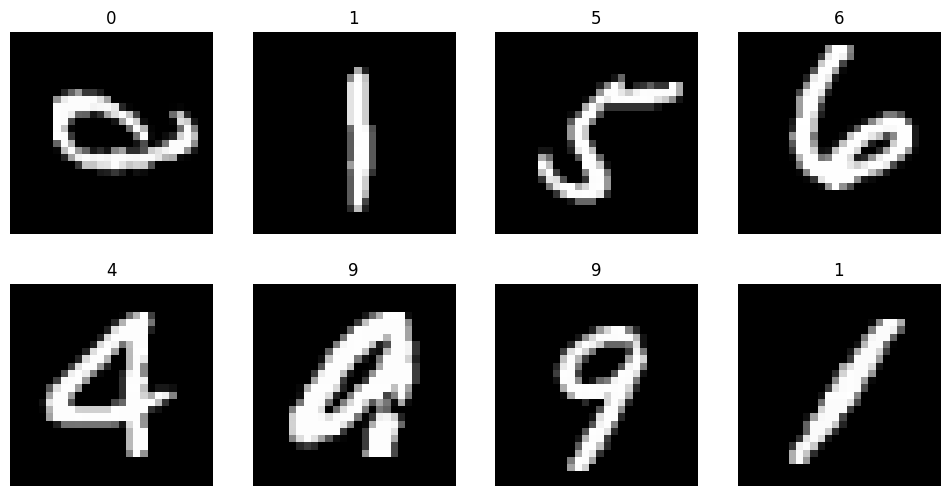

In [80]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1,cols * rows+1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap= 'gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [81]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [82]:
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 1.3689, -1.3142,  0.8490,  ..., -0.1600, -0.8526, -0.2235],
        [-0.3163, -0.5519, -0.6260,  ...,  0.0955, -0.8591, -0.0643],
        [ 0.6901,  0.0683,  0.8935,  ..., -0.3715,  0.1350, -1.4646],
        ...,
        [ 1.0418, -0.3389, -0.6803,  ..., -1.7587,  2.1906, -1.4690],
        [ 0.9484,  0.0947, -0.5903,  ..., -0.6745,  1.2842,  0.6086],
        [ 0.9146,  0.6856, -0.7846,  ..., -0.7160, -1.1556,  0.2909]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.5704, -0.8189,  0.8831,  ..., -0.3840, -0.9726,  0.0335],
        [-0.3383, -0.4906, -0.1443,  ...,  0.6922,  0.1765,  0.4134],
        [ 0.0739, -0.9720, -0.4653,  ..., -0.2180,  0.1679, -0.0890],
        ...,
        [-0.4492,  0.2408, -0.2017,  ..., -0.6578, -0.2095,  0.0199],
        [-0.1692,  0.3493, -0.1430,  ..., -0.4147, -0.0439,  0.2980],
        [ 0.4410,  0.1538,  1.0547,  ...,  0.5834,  0.0465, -0.4168]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [83]:
input = torch.rand(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [84]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [85]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [86]:
nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [87]:
layer = nn.Conv2d(1,20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [88]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [89]:
weight = weight.detach()

In [90]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

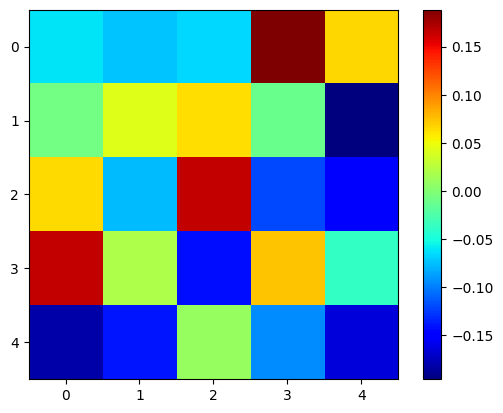

In [91]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [92]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [93]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output=output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

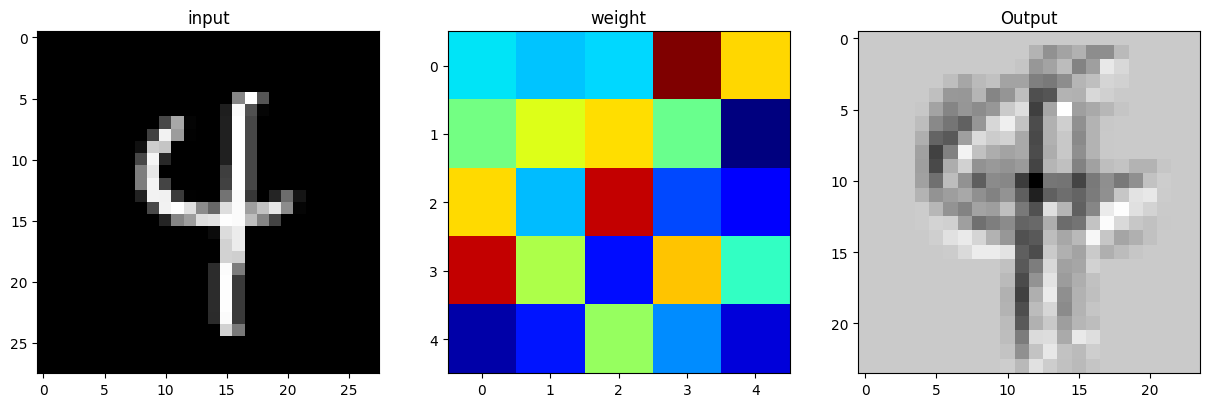

In [94]:
plt.figure(figsize = (15, 30))
plt.subplot(131)
plt.title("input")
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0, 0, :, :],'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :],'gray')

plt.show()




### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [95]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [96]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

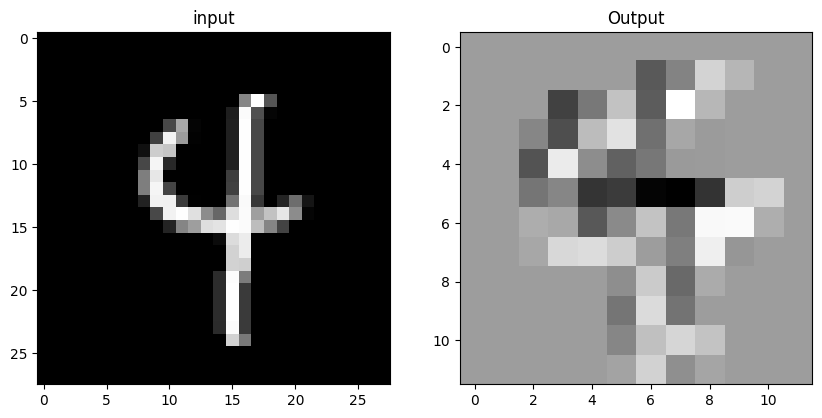

In [97]:
plt.figure(figsize = (10, 15))

plt.subplot(121)
plt.title("input")
plt.imshow(input_image,'gray')


plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :],'gray')

plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [98]:
flatten = input_image.view(1,28 * 28)
flatten.shape

torch.Size([1, 784])

In [99]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [100]:
lin

tensor([[-0.3899,  0.0809,  0.6116, -0.0448,  0.0521,  0.2269, -0.1467, -0.5621,
          0.4119, -0.3917]], grad_fn=<AddmmBackward0>)

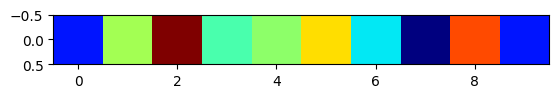

In [101]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [102]:
with torch.no_grad():
    flatten = input_image.view(1,28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim = 1)

softmax


tensor([[0.1495, 0.0850, 0.1114, 0.1206, 0.1042, 0.0834, 0.1080, 0.1044, 0.0493,
         0.0841]])

In [103]:
np.sum(softmax.numpy())

0.99999994

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [104]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [105]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 신경망 종류

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [106]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model,self).__init__()
        self.layer = nn.Linear(inputs,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [107]:
model =Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [108]:
class Model(nn.Module):
        def __init__(self):
            super(Model,self).__init__()
            self.layer1 = nn.Sequential(
                nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(2)
            )

            self.layer2 = nn.Sequential(
                nn.Conv2d(in_channels=64,out_channels=30,kernel_size=5),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(2)
            )

            self.layer3 = nn.Sequential(
                nn.Linear(in_features=30*5*5,out_features=10,bias=True),
                nn.ReLU(inplace=True),
            )

            def forward(self, x):
                x = self.layer1(x)
                x = self.layer2(x)
                x = x.view(x.shape[0], -1)
                x = self.layer3(x)
                return x


In [109]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [110]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [111]:
!pip install torchmetrics

In [112]:
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.0263, 0.1400, 0.7405, 0.0357, 0.0574],
        [0.0323, 0.0638, 0.6661, 0.0308, 0.2070],
        [0.0256, 0.1747, 0.4977, 0.0539, 0.2480],
        [0.1289, 0.4540, 0.1444, 0.2172, 0.0555],
        [0.2314, 0.0884, 0.0803, 0.4883, 0.1116],
        [0.2866, 0.0876, 0.2401, 0.0398, 0.3460],
        [0.1094, 0.1313, 0.0306, 0.1533, 0.5755],
        [0.0458, 0.4025, 0.0966, 0.2254, 0.2297],
        [0.1119, 0.0518, 0.2288, 0.4743, 0.1332],
        [0.1798, 0.1444, 0.2095, 0.2147, 0.2516]]) tensor([1, 4, 1, 1, 3, 4, 0, 0, 0, 2])
tensor(0.3000)


In [113]:
metric =  metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5,(10,))

    acc = metric(preds, target)
    print(acc)

acc = metric.compute()
print(acc)

tensor(0.3000)
tensor(0.3000)
tensor(0.2000)
tensor(0.2000)
tensor(0.2000)
tensor(0.2000)
tensor(0.1000)
tensor(0.1000)
tensor(0.)
tensor(0.3000)
tensor(0.1900)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

Text(0.5, 0, 'x')

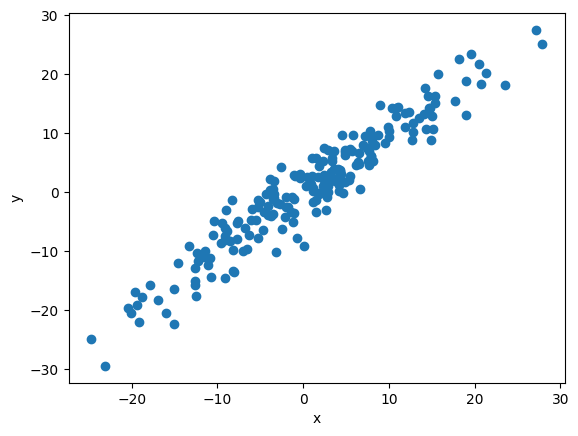

In [114]:
x = torch.randn(200,1) * 10
y = x + 3 * torch.randn(200,1)
plt.scatter (x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')


### 모델 정의 및 파라미터

In [115]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred


In [116]:
model =  LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.3692]], requires_grad=True), Parameter containing:
tensor([-0.2616], requires_grad=True)]


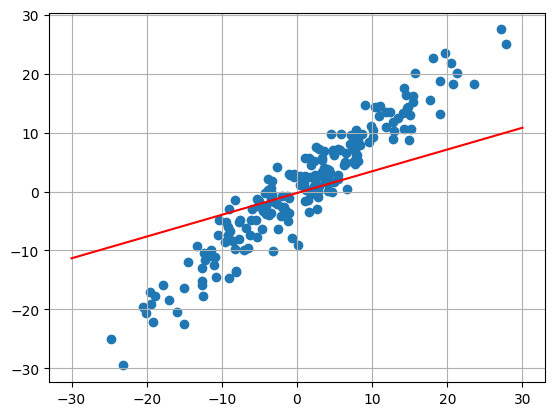

In [117]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 +b1

plt.plot(x1, y1, 'r')
plt.scatter(x,y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [118]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

### 모델 학습

In [119]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(x)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

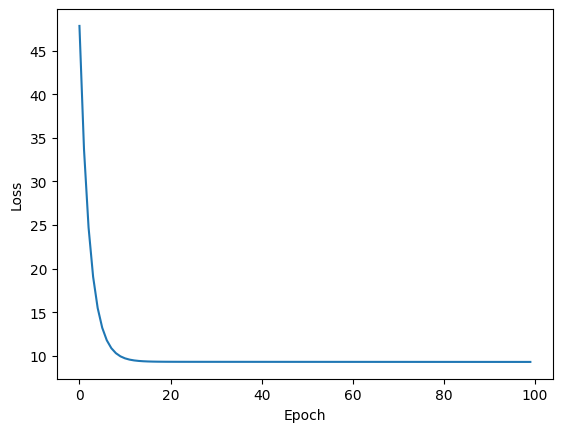

In [120]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

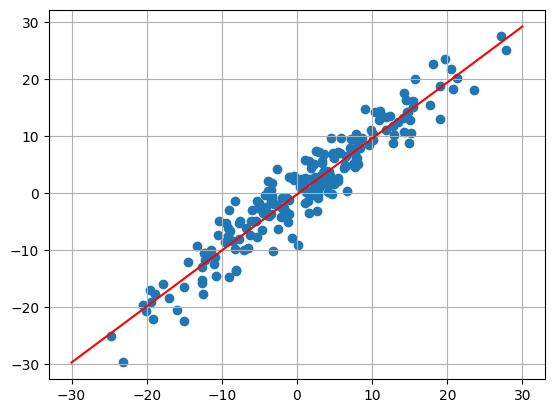

In [121]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 +b1

plt.plot(x1, y1, 'r')
plt.scatter(x,y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [122]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [123]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5, ))])

In [124]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train  = True, download = True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='/content/',
                                 train = False, download = True,
                                 transform=transform)

In [125]:
train_loader = DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [126]:
images, labels =  next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

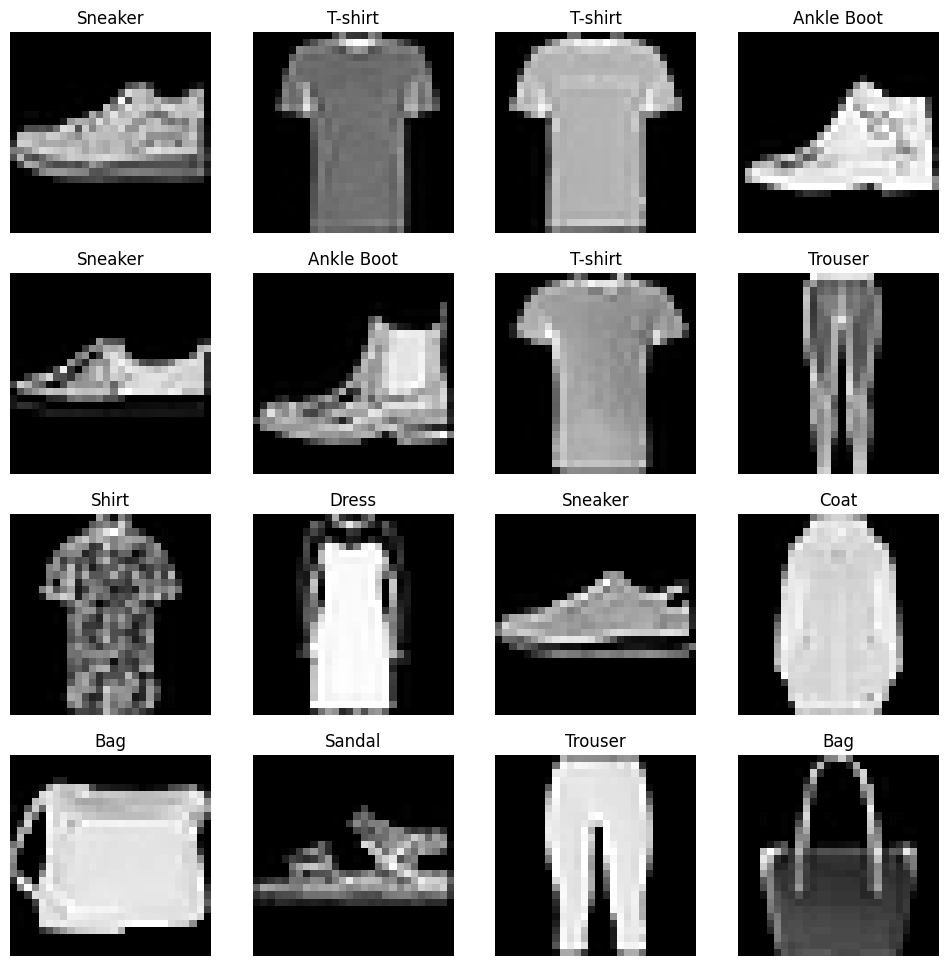

In [127]:
labels_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1,cols*rows+1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()



### 모델 정의 및 파라미터

In [128]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s

        return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [129]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [130]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.0010, -0.0815,  0.1393, -0.1153,  0.0671,  0.0018, -0.1314, -0.0548,
          0.0106,  0.0870]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [132]:
total_batch = len(train_loader)
print(total_batch)

469


In [133]:
for epoch in range(10):
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print("Epoch: {}, iter: {}, Loss: {}".format(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0

Epoch: 1, iter: 100, Loss: 0.11504040169715882
Epoch: 1, iter: 200, Loss: 0.11443792283535004
Epoch: 1, iter: 300, Loss: 0.11376023280620574
Epoch: 1, iter: 400, Loss: 0.11243605160713196
Epoch: 2, iter: 100, Loss: 0.10245433801412582
Epoch: 2, iter: 200, Loss: 0.08087904703617096
Epoch: 2, iter: 300, Loss: 0.05588325950503349
Epoch: 2, iter: 400, Loss: 0.04355904939770699
Epoch: 3, iter: 100, Loss: 0.03691407364606857
Epoch: 3, iter: 200, Loss: 0.036055927246809005
Epoch: 3, iter: 300, Loss: 0.03419788259267807
Epoch: 3, iter: 400, Loss: 0.03345354922115803
Epoch: 4, iter: 100, Loss: 0.03148976442217827
Epoch: 4, iter: 200, Loss: 0.03172913332283497
Epoch: 4, iter: 300, Loss: 0.03018915219604969
Epoch: 4, iter: 400, Loss: 0.029928428769111632
Epoch: 5, iter: 100, Loss: 0.029580900833010675
Epoch: 5, iter: 200, Loss: 0.028950919032096862
Epoch: 5, iter: 300, Loss: 0.02820333456993103
Epoch: 5, iter: 400, Loss: 0.028480743169784547
Epoch: 6, iter: 100, Loss: 0.027089654952287674
Epoch: 

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [134]:
PATH = './fashion_mist.pth'
torch.save(net.state_dict(), PATH)

In [135]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [136]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [137]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize = (16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


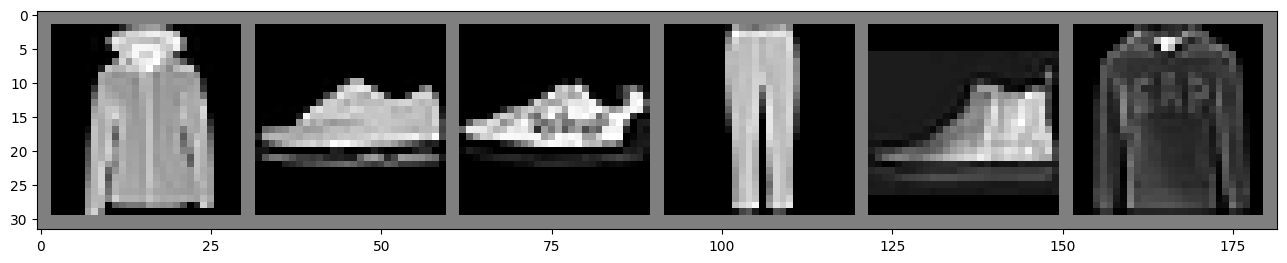

In [138]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [139]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([4, 7, 7, 1, 7, 2, 7, 4, 4, 9, 5, 9, 4, 7, 4, 3, 4, 2, 4, 1, 7, 7, 7, 7,
        4, 5, 9, 3, 8, 3, 2, 7, 2, 1, 1, 4, 7, 6, 5, 4, 2, 2, 4, 1, 8, 1, 8, 6,
        4, 5, 2, 7, 9, 9, 1, 2, 9, 4, 5, 2, 7, 8, 7, 2, 8, 3, 1, 7, 4, 5, 0, 2,
        1, 1, 7, 2, 5, 6, 7, 7, 5, 4, 2, 8, 4, 6, 8, 4, 8, 9, 4, 6, 8, 1, 4, 5,
        0, 9, 8, 2, 7, 4, 9, 2, 4, 8, 8, 2, 7, 0, 1, 4, 3, 4, 9, 7, 9, 5, 8, 0,
        4, 5, 2, 4, 5, 0, 1, 5])


In [140]:
print(''.join('{}. '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Coat. Sneaker. Sneaker. Trouser. Sneaker. Pullover. 


In [141]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)


82.8125
